In [1]:
#format the book
from book_format import load_style
load_style() 

Génération d'un signal d'accélération et

$ f = M\gamma + F_v v+ F_s$ M = 10 000kg (thèse de Eric Guillo) codeur 4096 pts par tour (p 164), chaine hyddralique de sortie de lapompe de translation, mettre un retarad, palier de vitesse de 4 km/h en marche avant et arrière,  ZZ4 : 637 kg.m^2, attention au masse tournante
empatttement 3m, dimaètre des toures 1,35m
Trouver Fv et Fs dans la thèse de Charles Eric

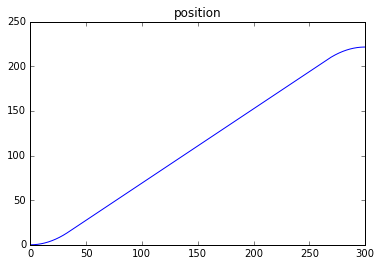

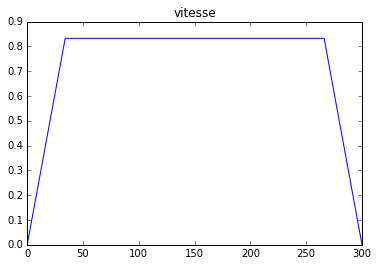

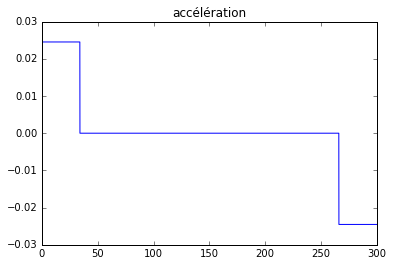

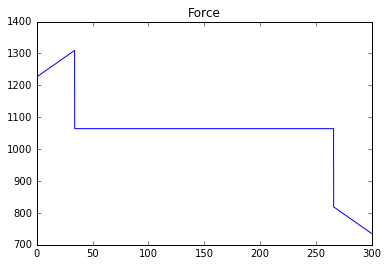

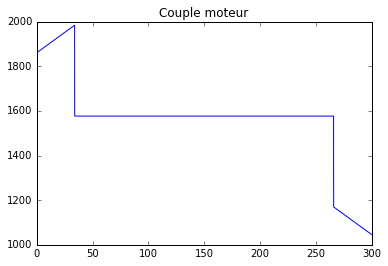

In [162]:

import numpy as np


g=9.81 # acceleration de la gravité
#g=10

M=10000  # vmasse de 10 tonnes
rayon = 1.35/2 # rayon des roues
ZZ = 600 # inertie des cylindres
#ZZ=0
Fv=100 # à vérifier dans la thèse de Charles Eric
mu=0.01
Fs = mu*M*g 

#vibration 30 Hz des cylindres
fc = 30

vitesse_max=6/3.6 # vitesse de 6 km/h
temps_max=5*60 # rayon de
acceleration_max = 0.005*g # acceleratmion maximale

vitesse_desire=vitesse_max/2 
acceleration_desire = acceleration_max /2 
tech = 0.05
nech=int(np.floor(temps_max/tech)+1)

temps_montee=vitesse_desire/acceleration_desire
ntemps_montee= int(np.floor(temps_montee/tech)+1) 
temps_montee=(ntemps_montee-1)*tech

temps=np.linspace(0,temps_max,num=nech)
montee=acceleration_desire*temps[0:ntemps_montee]
descente=montee[::-1]
palier=montee[-1]*np.ones(nech-2*ntemps_montee)
profil_vitesse=np.concatenate((montee, palier, descente))
profil_position=np.cumsum(profil_vitesse)*tech
montee=acceleration_desire*np.ones(ntemps_montee) 
palier=np.zeros(nech-2*ntemps_montee)
descente=-acceleration_desire*np.ones(ntemps_montee)
profil_acceleration=np.concatenate((montee,palier,descente))
profil_force = M*profil_acceleration+Fv*profil_vitesse + Fs 


#position articulaire sans glissement...
from math import pi
position_articulaire_cylindre=profil_position/rayon
vitesse_articulaire_cylindre=profil_vitesse/rayon
acceleration_articulaire_cylindre=profil_acceleration/rayon

#le couple moteur
profil_couple=profil_force/rayon + 2*ZZ*acceleration_articulaire_cylindre


import matplotlib.pyplot as plt
%matplotlib inline 
plt.figure(1)
plt.plot(temps, profil_position)
plt.title('position')
plt.figure(2)
plt.plot(temps, profil_vitesse)
plt.title('vitesse')
plt.figure(3)
plt.plot(temps, profil_acceleration)
plt.title('accélération')
plt.figure(4)
plt.plot(temps, profil_force)
plt.title('Force')
plt.figure(5)
plt.plot(temps, profil_couple)
plt.title('Couple moteur')







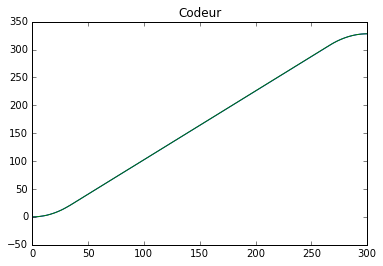

In [164]:
# signal de position
ncodeur= 100 # nombre de points par tout
#ncodeur= 100000000
pas_codeur = (2*pi)/ncodeur
nb_pas=position_articulaire_cylindre//pas_codeur
bruit=pas_codeur*np.random.randn(nech)/3 + pas_codeur*np.sin(2*pi*fc*temps);
#bruit=0 ;
codeur =nb_pas*pas_codeur+ bruit ;
plt.figure(1)
plt.plot(temps, position_articulaire_cylindre,temps, codeur)
plt.title('Codeur')

#signal de couple
couple_max=np.amax(profil_couple)
bruit=couple_max*np.random.randn(nech)/20 + couple_max*np.sin(2*pi*fc*temps)/100;
#bruit=0;
couple_mesure=profil_couple + bruit


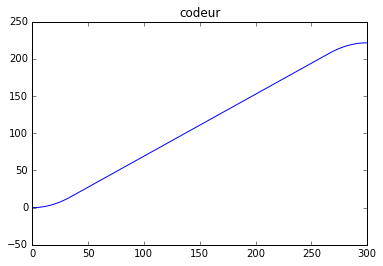

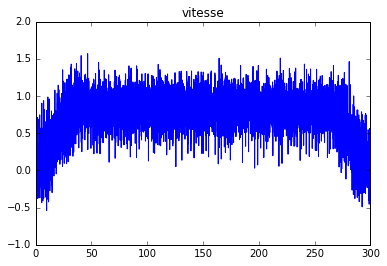

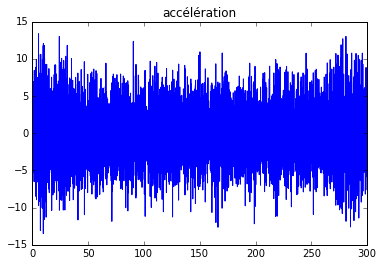

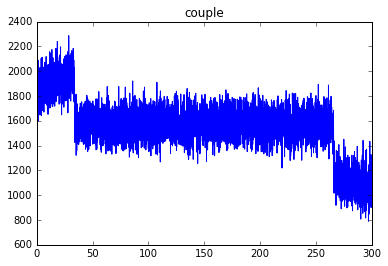

In [165]:
# calcul des vitesses et accélération de façon naïve
vitesse_codeur=(codeur[2:]-codeur[:-2])/(2*tech)
acceleration_codeur=(vitesse_codeur[2:]-vitesse_codeur[:-2])/(2*tech)
vitesse_codeur=vitesse_codeur[1:-1]
temps, codeur, couple_mesure = temps[2:-2], codeur[2:-2], couple_mesure[2:-2]

plt.figure(1)
plt.plot(temps, rayon*codeur)
plt.title('codeur')
plt.figure(2)
plt.plot(temps, rayon*vitesse_codeur)
plt.title('vitesse')
plt.figure(3)
plt.plot(temps, rayon*acceleration_codeur)
plt.title('accélération')
plt.figure(4)
plt.plot(temps, couple_mesure)
plt.title('couple')



In [166]:
observation = np.transpose([rayon*acceleration_codeur, rayon*vitesse_codeur,np.ones(np.size(temps))])
y=np.transpose(rayon*couple_mesure)
sol=np.linalg.lstsq(observation,y)[0]

In [167]:
sol

array([  1.42713637e-01,   4.46868487e+01,   1.02124879e+03])

In [123]:
Fs

981.0

In [161]:
np.linalg.cond(observation)

6.5737285756977251